In [10]:
import pandas as pd  
import talib
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [11]:
class my_strategy2(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if not self.position: # 没有持仓
            #self.order = self.buy(size=500)
            #self.order_target_value(target=10000)
            #self.order_target_size(target=10000)(佣金)
            self.order_target_percent(target=0.7)
            #print(self.datetime.date(0),self.position)

In [ ]:
class my_strategy_ma30(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if not self.position: # 没有持仓
            #self.order = self.buy(size=500)
            #self.order_target_value(target=10000)
            #self.order_target_size(target=10000)(佣金)
            self.order_target_percent(target=0.7)
            #print(self.datetime.date(0),self.position)

In [12]:
def get_data(symbol,start_date,end_date):
    stock_pinan = ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date=start_date, end_date=end_date, adjust="qfq")
    stock_pinan.columns=['date','股票代码',"open","close","high","low","volume",'成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
    stock_pinan["date"]=pd.to_datetime(stock_pinan["date"])
    stock_pinan['openinterest']=0
    stock_pinan.set_index("date",inplace=True)
    return stock_pinan[["open","high","low","close","volume","openinterest"]]
start="20100101"
end='20200331'
stock_pinan=get_data("600000",start,end)

In [13]:
stock_pinan

,open,high,low,close,volume,openinterest
date,,,,,,
2010-01-04,4.20,4.22,3.93,3.94,661913,0
2010-01-05,4.03,4.10,3.77,4.01,1151479,0
2010-01-06,3.98,3.99,3.81,3.83,967826,0
2010-01-07,3.81,3.88,3.57,3.64,852361,0
2010-01-08,3.59,3.78,3.57,3.73,657076,0
...,...,...,...,...,...,...
2020-03-25,8.07,8.14,7.99,8.02,321723,0
2020-03-26,7.97,8.24,7.95,8.10,309218,0
2020-03-27,8.22,8.25,8.07,8.11,271080,0


In [14]:
def huice_run(start,end,stock,strategy):
  # 加载数据
    data = bt.feeds.PandasData(dataname=stock,fromdate=start,todate=end)

    # 初始化cerebro回测系统设置                           
    cerebro = bt.Cerebro()  
    #将数据传入回测系统
    cerebro.adddata(data) 
    # 将交易策略加载到回测系统中
    cerebro.addstrategy(strategy) 
    # 设置初始资本为10,000
    startcash = 10000
    cerebro.broker.setcash(startcash) 
    # 设置交易手续费为 0.2%
    cerebro.broker.setcommission(commission=0.002) 


    print(start.date(),end.date())
    print('初始资金: %.2f' % cerebro.broker.getvalue())
    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = 'SharpeRatio')
    # cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DW')
    results = cerebro.run()
    strat = results[0]
    print('最终资金: %.2f' % cerebro.broker.getvalue())
    # print('夏普比率:', strat.analyzers.SharpeRatio.get_analysis())
    # print('回撤指标:', strat.analyzers.DW.get_analysis())
    
    return cerebro
huice_result=huice_run(datetime(2010, 3, 31),datetime(2020, 3, 31),stock_pinan,my_strategy2)

2010-03-31 2020-03-31
初始资金: 10000.00
最终资金: 15203.07


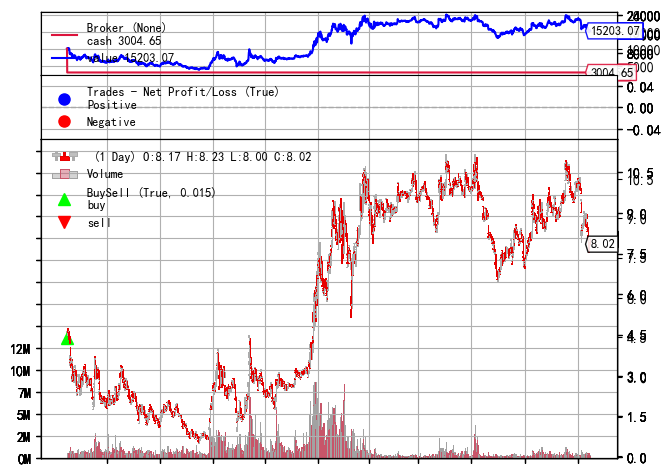

[[<Figure size 640x480 with 20 Axes>]]

In [15]:
%matplotlib inline
huice_result.plot(style='candlestick', iplot=False, block=True)